In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [32]:
file_path = 'Chennai.csv'
df = pd.read_csv(file_path)


EDA

In [33]:
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0         

In [34]:
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              Price         Area  No. of Bedrooms       Resale  \
count  5.014000e+03  5014.000000      5014.000000  5014.000000   
mean   8.731264e+06  1232.992022         2.362984     0.097128   
std    1.034261e+07   641.841841         0.705252     0.296162   
min    2.000000e+06   362.000000         1.000000     0.000000   
25%    4.095000e+06   865.000000         2.000000     0.000000   
50%    5.782000e+06  1067.000000         2.000000     0.000000   
75%    8.675000e+06  1438.750000         3.000000     0.000000   
max    1.900000e+08  7240.000000         5.000000     1.000000   

       MaintenanceStaff    Gymnasium  SwimmingPool  LandscapedGardens  \
count       5014.000000  5014.000000   5014.000000        5014.000000   
mean           5.000997     5.213602      5.160949           5.114878   
std            4.464256     4.239118      4.296954           4.346406   
min            0.000000     0.000000      0.000000           0.000000   
25%            0.00

In [35]:
print("\nInformation about the dataset:")
print(df.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  50

In [36]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe          

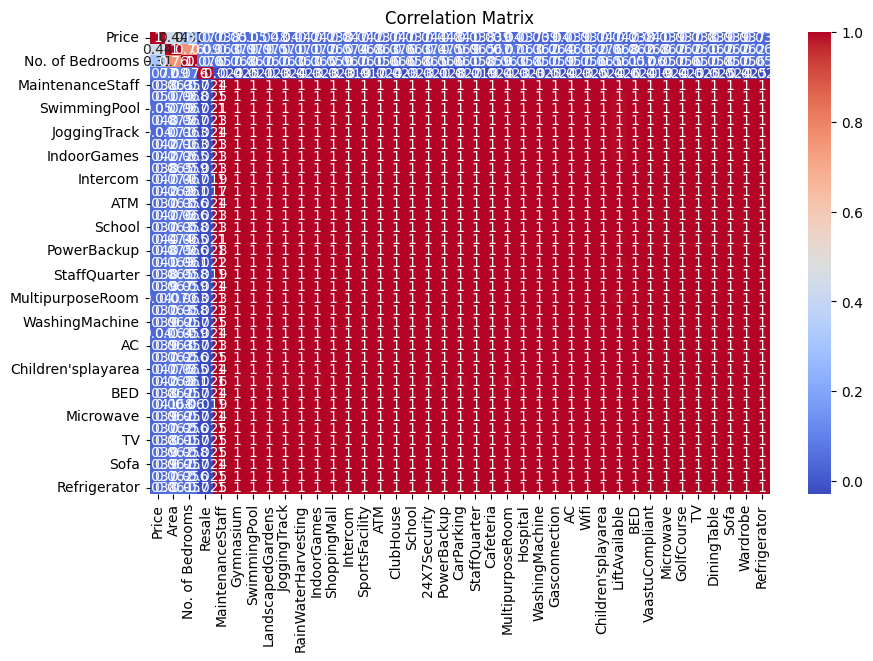

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [38]:
sns.pairplot(numeric_df)
plt.show()


KeyboardInterrupt: 

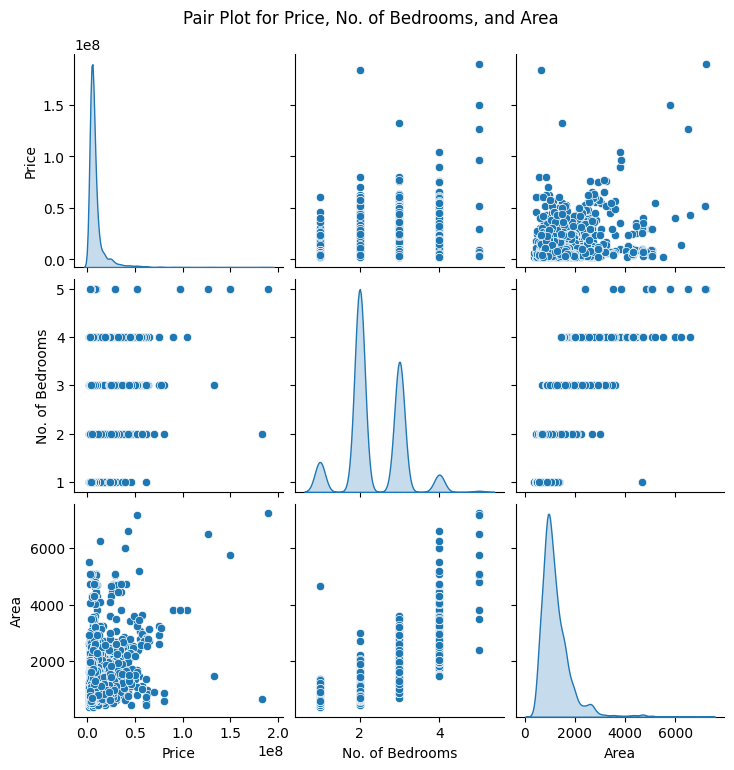

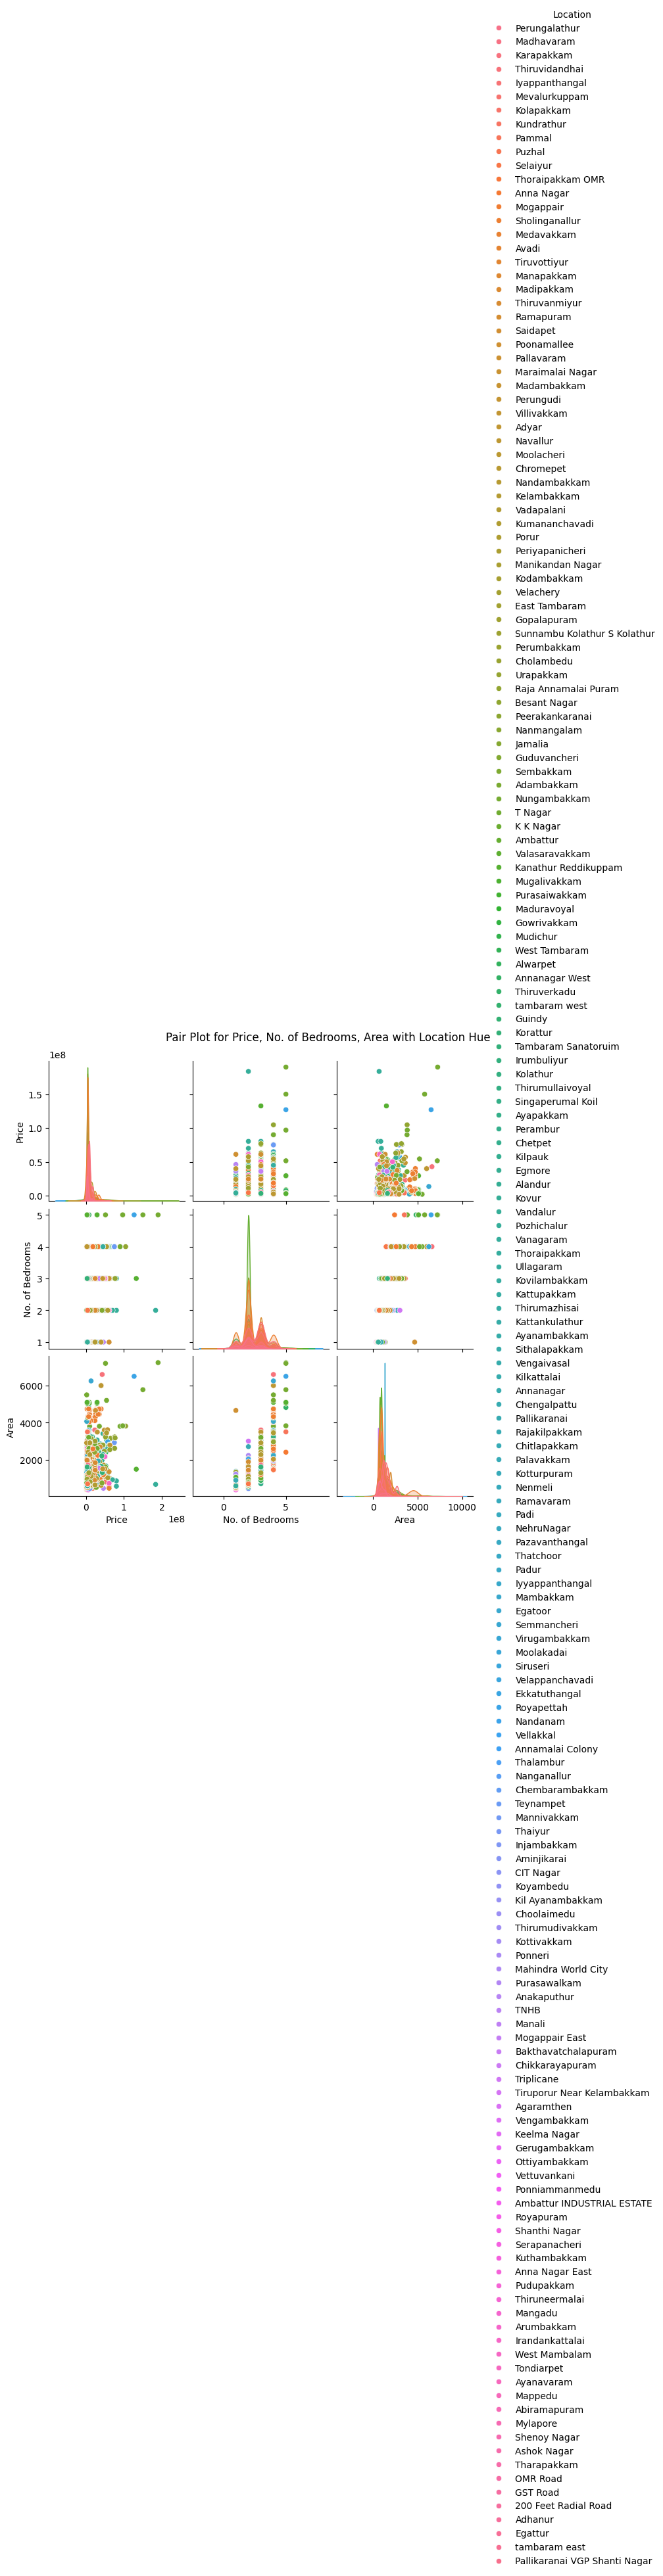

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Chennai.csv'
df = pd.read_csv(file_path)

# Select the relevant columns for the pair plot
selected_columns = ['Price', 'No. of Bedrooms', 'Area']

# Generate the pair plot
sns.pairplot(df[selected_columns], kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot for Price, No. of Bedrooms, and Area', y=1.02)
plt.show()

# Pair plot with hue based on Location
sns.pairplot(df[selected_columns + ['Location']], hue='Location', kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot for Price, No. of Bedrooms, Area with Location Hue', y=1.02)
plt.show()


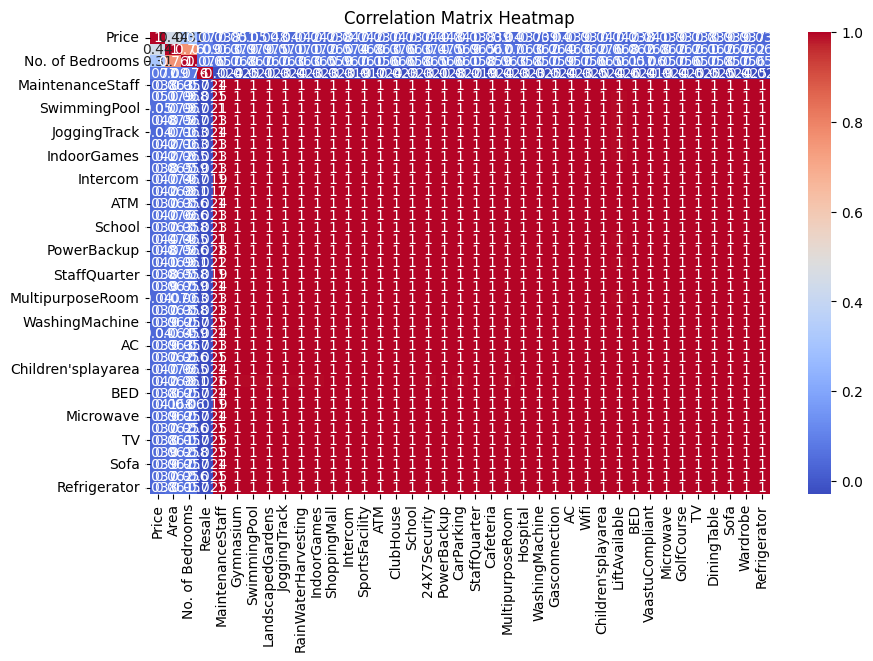

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import plotly.express as px

# Create a sunburst chart using relevant categorical and numerical columns
fig = px.sunburst(df, path=['Location', 'No. of Bedrooms'], values='Price', 
                  color='Price', hover_data=['Area'],
                  color_continuous_scale='RdBu', 
                  title='Sunburst Chart of Rent Price by Location and Bedrooms')

fig.show()


In [ ]:

# Create a treemap using the same columns as the sunburst chart
fig = px.treemap(df, path=['Location', 'No. of Bedrooms'], values='Price', 
                 color='Price', hover_data=['Area'],
                 color_continuous_scale='RdBu', 
                 title='Treemap of Rent Price by Location and Bedrooms')

fig.show()


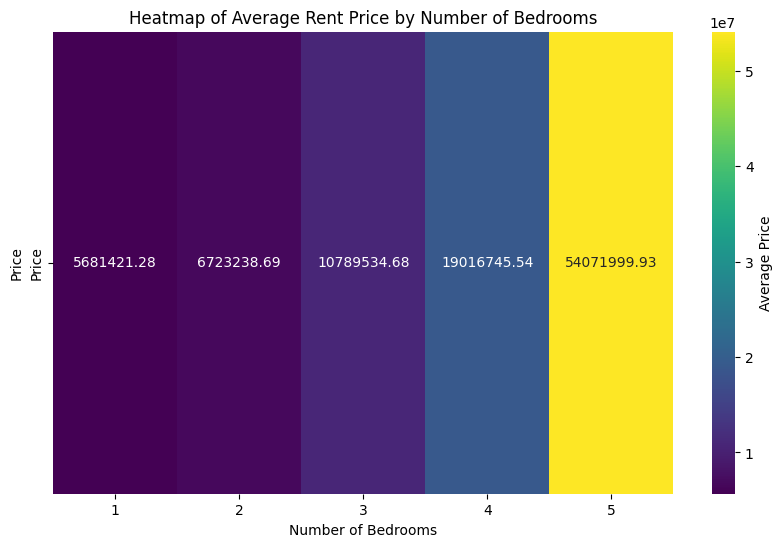

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Chennai.csv'
df = pd.read_csv(file_path)

# Aggregate data: Average Price by Number of Bedrooms
bedroom_price_avg = df.groupby('No. of Bedrooms')['Price'].mean().reset_index()

# Create a heatmap-compatible format
plt.figure(figsize=(10, 6))

# Using a different colormap for better aesthetics (e.g., "viridis")
sns.heatmap(data=bedroom_price_avg.set_index('No. of Bedrooms').T, 
            annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Average Price'})

plt.title('Heatmap of Average Rent Price by Number of Bedrooms')
plt.ylabel('Price')
plt.xlabel('Number of Bedrooms')
plt.show()


Prepare the Data for Modeling

In [41]:
data_selected = df[['Price', 'Area', 'No. of Bedrooms', 'Location']].copy()




In [ ]:

data_selected.rename(columns={'Price': 'RentPrice', 'No. of Bedrooms': 'Bedrooms'}, inplace=True)

In [42]:
data_selected.dropna(inplace=True)


In [43]:

X = data_selected.drop('RentPrice', axis=1)
y = data_selected['RentPrice']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Categorical and numerical features

In [46]:
categorical_features = ['Location']
numerical_features = ['Area', 'Bedrooms']


In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


Model Pipeline using linear regression

In [49]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [50]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Area', 'Bedrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [52]:
joblib.dump(model, 'chennai house_price_model.pkl')


['chennai house_price_model.pkl']

In [53]:
y_pred = model.predict(X_test)


Evaluate the Model

In [54]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


RMSE: 10341588.946348952
MAE: 4301225.864896277
R^2: 0.24048976373742015
